1.  **timestamp** - A timestamp for the minute covered by the row.
2.  **Asset_ID** - An ID code for the cryptoasset.
3.  **Count** - The number of trades that took place this minute.
4.  **Open** - The USD price at the beginning of the minute.
5.  **High** - The highest USD price during the minute.
6.  **Low** - The lowest USD price during the minute.
7.  **Close** - The USD price at the end of the minute.
8.  **Volume** - The number of cryptoasset u units traded during the minute.
9.  **VWAP** - The volume-weighted average price for the minute.
10. **Target** - 15 minute residualized returns. See the 'Prediction and Evaluation section of this notebook for details of how the target is calculated.
11. **Weight** - Weight, defined by the competition hosts [here](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition) (For bitcoin, it is 2.397895)
12. **Asset_Name** - Human readable Asset name.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math

In [2]:
df = pd.read_csv("Bitcoin/full_data__1__2021.csv")
df.head()

,Unnamed: 0,timestamp,Asset_ID,Asset_Name,Weight,Count,Open,High,Low,Close,Volume,VWAP,Target
0,18935914,1609459260,1,NaN,NaN,4039.0,28985.511250,29086.90,28960.0,29032.387500,163.787036,29017.664870,0.000396
1,18935928,1609459320,1,NaN,NaN,1969.0,29031.175000,29079.56,28951.5,29002.956734,98.754670,29014.703526,-0.000069
2,18935942,1609459380,1,NaN,NaN,1689.0,29002.977509,29069.39,28967.8,29005.580000,55.202131,29003.078663,-0.000137
3,18935956,1609459440,1,NaN,NaN,1146.0,29004.293750,29057.73,28971.8,29000.490000,56.575903,29006.256629,-0.000682
4,18935970,1609459500,1,NaN,NaN,2088.0,28994.918934,29031.71,28929.3,28962.285818,70.319136,28972.005783,-0.000446


In [3]:
df = df.dropna(axis=1, how="all")
df.head()

,Unnamed: 0,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,18935914,1609459260,1,4039.0,28985.511250,29086.90,28960.0,29032.387500,163.787036,29017.664870,0.000396
1,18935928,1609459320,1,1969.0,29031.175000,29079.56,28951.5,29002.956734,98.754670,29014.703526,-0.000069
2,18935942,1609459380,1,1689.0,29002.977509,29069.39,28967.8,29005.580000,55.202131,29003.078663,-0.000137
3,18935956,1609459440,1,1146.0,29004.293750,29057.73,28971.8,29000.490000,56.575903,29006.256629,-0.000682
4,18935970,1609459500,1,2088.0,28994.918934,29031.71,28929.3,28962.285818,70.319136,28972.005783,-0.000446


In [4]:
len(df)

525570

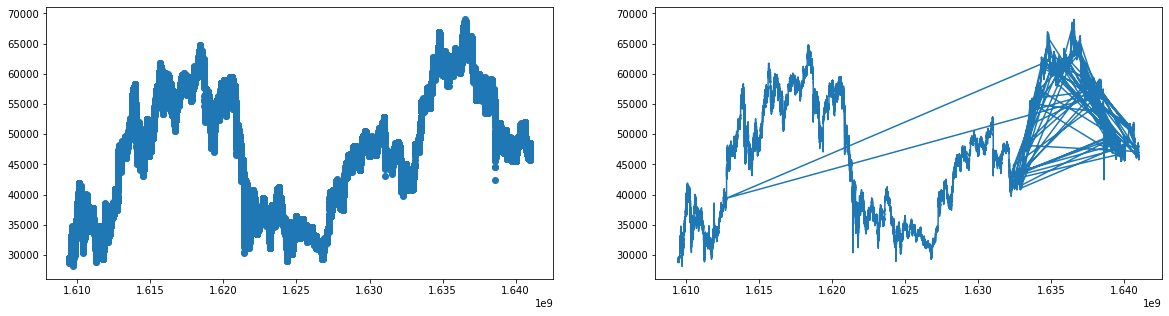

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.scatter(df["timestamp"], df["Open"])
ax2.plot(df["timestamp"], df["Open"])

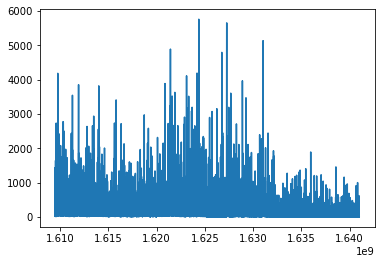

In [6]:
plt.plot(df["timestamp"], df["Volume"])

In [7]:
normalTime = []
for t in df['timestamp']:
    normalTime.append(datetime.datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')) 

normalTime[:5]

['2021-01-01 00:01:00',
 '2021-01-01 00:02:00',
 '2021-01-01 00:03:00',
 '2021-01-01 00:04:00',
 '2021-01-01 00:05:00']

In [8]:
df["Normal Time"] = normalTime

In [9]:
def timeReturn(t):
    return datetime.datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')

In [10]:
X = df["timestamp"][:1439]
y1 = df["Open"][:1439]
y2 = df["Close"][:1439]
t = df["Normal Time"][:1439]

<ipython-input-13-77de04bafd4a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newXL)


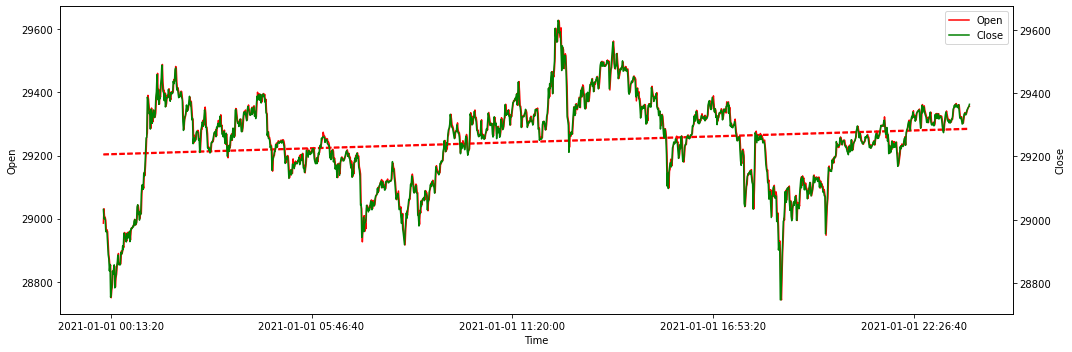

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))

z1 = np.polyfit(X, y1, 1)
p1 = np.poly1d(z1)
ax.plot(X, p1(X), 'r--')
l1 = ax.plot(X, y1, color="red", label="Open")
ax.set_xlabel("Time")
ax.set_ylabel("Open")
xL = ax.get_xticks().tolist()
newXL = [timeReturn(t) for t in xL]
ax.set_xticklabels(newXL)

z2 = np.polyfit(X, y2, 1)
p2 = np.poly1d(z2)
ax2 = ax.twinx()
ax2.plot(X, p2(X), 'r--')
l2 = ax2.plot(X, y2, color="green", label="Close")
ax2.set_ylabel("Close")

l = l1+l2
lb = [line.get_label() for line in l]
ax.legend(l, lb, loc=0)
#ax2.legend(loc=0)

plt.tight_layout()
plt.show()
plt.savefig("2021.png")

In [31]:
timeReturn(1609465000), df["timestamp"][100], normalTime[1439]

('2021-01-01 01:36:40', 1609465260, '2021-01-02 00:00:00')

(array([5.02045e+05, 1.77140e+04, 3.57000e+03, 1.12700e+03, 5.03000e+02,
        2.41000e+02, 1.48000e+02, 7.10000e+01, 4.90000e+01, 3.10000e+01,
        2.10000e+01, 1.30000e+01, 1.20000e+01, 1.00000e+01, 8.00000e+00,
        1.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([5.00000000e-04, 2.87938409e+02, 5.75876317e+02, 8.63814226e+02,
        1.15175213e+03, 1.43969004e+03, 1.72762795e+03, 2.01556586e+03,
        2.30350377e+03, 2.59144168e+03, 2.87937959e+03, 3.16731749e+03,
        3.45525540e+03, 3.74319331e+03, 4.03113122e+03, 4.31906913e+03,
        4.60700704e+03, 4.89494495e+03, 5.18288285e+03, 5.47082076e+03,
        5.75875867e+03]),
 <BarContainer object of 20 artists>)

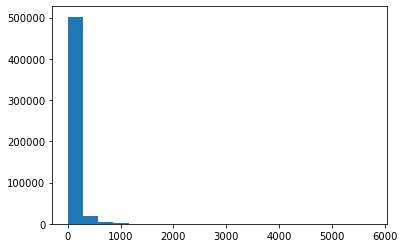

In [32]:
plt.hist(df["Volume"], bins=20)

In [33]:
z1[0], z2[0] # Slopes of open and close trend lines

(0.000941803231685946, 0.0009371809681121729)

In [34]:
df.head()

,Unnamed: 0,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Normal Time
0,18935914,1609459260,1,4039.0,28985.511250,29086.90,28960.0,29032.387500,163.787036,29017.664870,0.000396,2021-01-01 00:01:00
1,18935928,1609459320,1,1969.0,29031.175000,29079.56,28951.5,29002.956734,98.754670,29014.703526,-0.000069,2021-01-01 00:02:00
2,18935942,1609459380,1,1689.0,29002.977509,29069.39,28967.8,29005.580000,55.202131,29003.078663,-0.000137,2021-01-01 00:03:00
3,18935956,1609459440,1,1146.0,29004.293750,29057.73,28971.8,29000.490000,56.575903,29006.256629,-0.000682,2021-01-01 00:04:00
4,18935970,1609459500,1,2088.0,28994.918934,29031.71,28929.3,28962.285818,70.319136,28972.005783,-0.000446,2021-01-01 00:05:00


In [35]:
df.index[df["Normal Time"]=='2021-10-23 00:01:00'].tolist() # For data on a specific day

[521251]

In [36]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Normal Time
0,1609459260,1,4039.0,28985.511250,29086.90,28960.0,29032.387500,163.787036,29017.664870,0.000396,2021-01-01 00:01:00
1,1609459320,1,1969.0,29031.175000,29079.56,28951.5,29002.956734,98.754670,29014.703526,-0.000069,2021-01-01 00:02:00
2,1609459380,1,1689.0,29002.977509,29069.39,28967.8,29005.580000,55.202131,29003.078663,-0.000137,2021-01-01 00:03:00
3,1609459440,1,1146.0,29004.293750,29057.73,28971.8,29000.490000,56.575903,29006.256629,-0.000682,2021-01-01 00:04:00
4,1609459500,1,2088.0,28994.918934,29031.71,28929.3,28962.285818,70.319136,28972.005783,-0.000446,2021-01-01 00:05:00


In [25]:
def getCurrentEpochTime():
    normalTime = datetime.datetime.now().timestamp()
    return math.floor(normalTime)

getCurrentEpochTime()

1643892965

In [26]:
np.mean(df["Open"])

47368.8807621754

In [122]:
weight = 0.95

In [123]:
openForecast = [np.mean(df["Open"])]

for o in df["Open"][1:]:
    f = (float) (weight*o + (1-weight)*openForecast[-1])
    openForecast.append(f);

openForecast[1:10]    

[29948.060288108773,
 29050.23164812169,
 29006.590644906086,
 28995.502519569054,
 28963.26977788608,
 28964.704488894302,
 28959.397867301854,
 28923.338411237237,
 28888.111545561864]

In [124]:
for o in df["Open"][1:10]:
    print(o)

29031.175
29002.977509175
29004.29375
28994.918934025
28961.5733177975
28964.78
28959.118571428568
28921.44054512857
28886.2575


In [125]:
len(openForecast), len(df["Open"])

(525570, 525570)

In [126]:
diff = df["Open"]-openForecast
diff[:10]

0   -18383.369512
1     -916.885288
2      -47.254139
3       -2.296895
4       -0.583586
5       -1.696460
6        0.075511
7       -0.279296
8       -1.897866
9       -1.854046
Name: Open, dtype: float64

In [127]:
diff2 = np.square(diff)
diff2[:10]

0    3.379483e+08
1    8.406786e+05
2    2.232954e+03
3    5.275726e+00
4    3.405721e-01
5    2.877977e+00
6    5.701927e-03
7    7.800618e-02
8    3.601896e+00
9    3.437485e+00
Name: Open, dtype: float64

In [128]:
sumOpen = 0

for num in diff2[1:]:
    sumOpen += num

sumOpen/(len(diff2)-1)

68.17781615163399

In [129]:
currOpenPredicted = weight*list(df["Open"])[-1] + (1-weight)*openForecast[-1]
#openForecast.append(currOpenPredicted)
currOpenPredicted 

57158.21294812758

In [130]:
df.tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Normal Time
525565,1637798100,1,613.0,57124.38,57169.28,57124.38,57155.37,15.12661,133345.450000,0.005561,2021-11-24 23:55:00
525566,1637798160,1,704.0,57155.37,57196.49,57141.54,57190.88,13.97363,133401.656667,0.005966,2021-11-24 23:56:00
525567,1637798220,1,639.0,57190.87,57191.04,57150.93,57174.63,12.49147,133400.180000,0.005626,2021-11-24 23:57:00
525568,1637798280,1,659.0,57174.63,57178.42,57137.56,57158.17,27.41684,133368.703333,0.005403,2021-11-24 23:58:00
525569,1637798340,1,753.0,57158.17,57193.14,57130.99,57138.29,19.92652,133370.226667,0.004228,2021-11-24 23:59:00
